In [1]:
# 텍스트 분석 순서
# 문장 -> 단어 -> 키워드 -> 필터링 -> 집계 -> 시각화

# Step 1. 필요한 모듈 실행
from konlpy.tag import Kkma
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from collections import Counter
import numpy as np

kkma = Kkma()

In [3]:
# 파일 불러와서 형태소 분석하기
data1 = open('경주여행_지식인_2016_2.txt').read()
data1
data2 = kkma.nouns(data1)
data3 = Counter(data2)

In [6]:
# 불용어 제거하기
stop_words = open('stop_words.txt').read()
data3 = [each_word for each_word in data2
           if each_word not in stop_words ]
data3
# 1글자 이하이거나 10글자 이상인 단어 삭제하기
data4 = []
for i in range(0, len(data3)):
    if len(data3[i]) >= 2 | len(data3[i]) <= 10:
        data4.append(data3[i])

In [7]:
# 단어 별 빈도수 집계하기
data5 = Counter(data4)
data6 = data5.most_common(100)
tmp_data = dict(data6)
tmp_data

{'감포': 3,
 '파크': 2,
 '대릉원': 2,
 '월지': 2,
 '월성': 2,
 '야경': 2,
 '테디': 2,
 '신라': 2,
 '펜션': 2,
 '시간': 2,
 '경주시': 2,
 '중부': 2,
 '동천': 2,
 '거동': 2,
 '오리배': 2,
 '바퀴': 2,
 '감포해수욕장': 2,
 '하동': 2,
 '교촌': 2,
 '공연': 2,
 '제목': 1,
 '여행': 1,
 '문의': 1,
 '드립': 1,
 '질문': 1,
 '마감': 1,
 '내용': 1,
 '안녕': 1,
 '겨울': 1,
 '아이': 1,
 '준비': 1,
 '2박': 1,
 '3박': 1,
 '정도': 1,
 '계획': 1,
 '계획중': 1,
 '유적지': 1,
 '물놀이': 1,
 '놀이': 1,
 '호텔': 1,
 '리조트': 1,
 '중아이': 1,
 '실내': 1,
 '워터': 1,
 '어디': 1,
 '추천': 1,
 '부탁': 1,
 '답변': 1,
 '아빠': 1,
 '추억': 1,
 '바람': 1,
 '경험': 1,
 '공유': 1,
 '겨울철': 1,
 '날씨': 1,
 '실외': 1,
 '균형': 1,
 '코스': 1,
 '설정': 1,
 '권역': 1,
 '정리': 1,
 '보문': 1,
 '관광': 1,
 '단지': 1,
 '수영장': 1,
 '파트': 1,
 '블루': 1,
 '블루원': 1,
 '대규모': 1,
 '실내워터파크': 1,
 '월드': 1,
 '아쿠아': 1,
 '시설': 1,
 '경주대명리조트': 1,
 '대명': 1,
 '소규모': 1,
 '한화': 1,
 '드림': 1,
 '센터': 1,
 '여행지': 1,
 '주요': 1,
 '만약': 1,
 '결정': 1,
 '중앙': 1,
 '시내': 1,
 '볼거리': 1,
 '반나절': 1,
 '나절': 1,
 '소요': 1,
 '경주교촌한옥': 1,
 '한옥': 1,
 '마을': 1,
 '월정': 1,
 '월정교': 1,
 '향교': 1,
 '물왕릉': 1,
 '왕릉

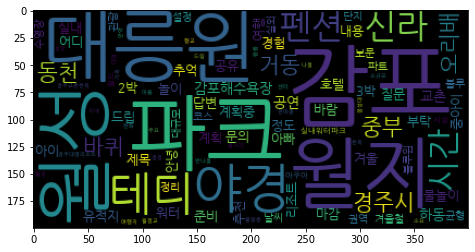

In [12]:
# 워드 클라우드 그리기
wordcloud = WordCloud(font_path = 'NanumGothic.TTF',
                     relative_scaling = 0.2,
                     background_color = 'black',
                     ).generate_from_frequencies(tmp_data)
plt.figure(figsize = (8,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

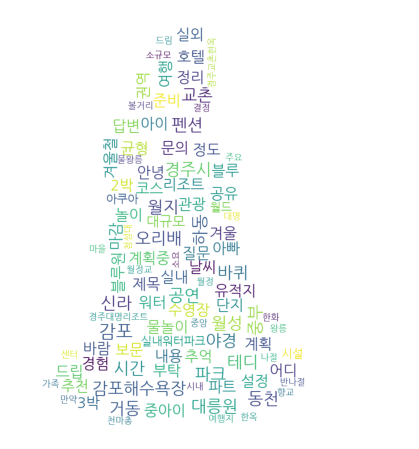

In [15]:
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator
alice_mask = np.array(Image.open('alice.jpg'))
wc = WordCloud(font_path = 'NanumGothic.TTF',
              relative_scaling = 0.2, mask = alice_mask,
              background_color = 'white',
              min_font_size = 1,
              max_font_size = 40,
              max_words = 2000,
              ).generate_from_frequencies(tmp_data)
plt.figure(figsize = (8,8))
plt.imshow(wc)
plt.axis('off')
plt.show()

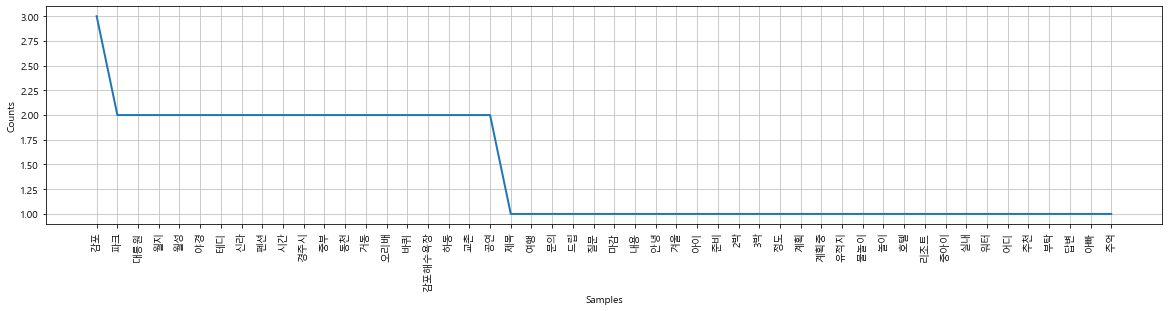

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [20]:
# 그래프에 출력되는 한글을 위해 폰트 설정
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

font_location = 'NanumGothic.TTF'
matplotlib.rc('font', family = 'Malgun Gothic')

import nltk
plt.figure(figsize = (20, 4))

from nltk.probability import FreqDist
g_data4 = FreqDist(data4)
g_data4.plot(50)